# Part 3 Deep Learning
### 1. Load and Split Preprocessed Data
#### Loading Data
First, we need to load the data from the kaggle input data. There are dataset for training, testing and image label mapping file.

In [6]:
# Import related libraries
import pandas as pd
import numpy as np
import os
import cv2

# Load CSV files
train_df = pd.read_csv('./../../nzmsa-2024/train.csv')

# Directories for images
train_dir = './../../nzmsa-2024/cifar10_images/train/'
test_dir = './../../nzmsa-2024/cifar10_images/test/'

# Function to load images
def load_images(length, directory):
    images = []
    for img_id in range(length):
        img_path = os.path.join(directory, f"image_{img_id}.png")
        image = cv2.imread(img_path)
        image = cv2.resize(image, (32, 32))
        images.append(image)
    return np.array(images)

# Load Images
X_train = load_images(len(train_df),train_dir)
X_test = load_images(len(os.listdir(test_dir)), test_dir) 

# Load labels
y_train = train_df['label'].values

#### Splitting Data
Use scikit-learn to split the data into training, validation, and test sets. We'll use a random state of 101 to ensure reproducibility.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.2,
                                                  random_state=101)

### 2. Chosse an algorithm
Here, we are using CNN model. The CIFAR-10 dataset is typically handled well with Convolutional Neural Networks(CNNs)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding='same', activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(196, activation='softmax', name='output'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_cnn_model()

/Users/mattyang/Documents/MSA24/phase2_ds/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3. Train and Test the model
#### Training the model
- Compile the model with 'adam' optimizer, 'categorical cross-entropy' loss function and 'accuracy' mertics.
- Fit the model using training data and validate with the validation set.


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.1759 - loss: 2.4169 - val_accuracy: 0.4242 - val_loss: 1.5573
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 166s 133ms/step - accuracy: 0.4226 - loss: 1.5749 - val_accuracy: 0.4633 - val_loss: 1.4758
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.5185 - loss: 1.3428 - val_accuracy: 0.5609 - val_loss: 1.2390
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - accuracy: 0.5928 - loss: 1.1502 - val_accuracy: 0.6175 - val_loss: 1.0862
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - accuracy: 0.6480 - loss: 1.0075 - val_accuracy: 0.6370 - val_loss: 1.0513
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 159s 127ms/step - accuracy: 0.6928 - loss: 0.8835 - val_accuracy: 0.6609 - val_loss: 0.9975
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 129ms/step - accuracy: 0.7342 - loss: 0.7686 - val_accuracy: 0.6109 - val_loss: 1.1948
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 166s 132ms/step - ac

#### Testing the model
- Evaluate the model on the test set to determine its performance
- Record the accuracy for both the training and test sets

In [10]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.6301 - loss: 1.1681
Test accuracy: 0.63


Here we can see the model accuracy is 0.6301 and the loss is 1.1681

### 4. Evaluate the model
#### Confusion matrix and metrics
Calculate and interpret evaluation metrics like confusion matrix, precision, recall and F1-score.

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on validation data
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred_classes)

# Classification report
class_report = classification_report(y_val, y_val_pred_classes)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step
Confusion Matrix:
 [[455  41  50  17  56 238  43  36  14  15]
 [ 57 740  51   7  27 100   9   7  20   4]
 [121 105 507  14  51  54  57  23   7   8]
 [ 23   9  11 786  14   7 125   3  31  31]
 [108  40  80  20 473  94 113  20   9   8]
 [183  77  43   6  55 596  19  26  17   4]
 [ 29  14  28  80  31  15 780   6  28  14]
 [181  16  58  15  58  83  16 535  15  16]
 [ 36  23  10  38   4  39  66   5 674 106]
 [ 18   3  11  65   4  16  45  10 120 724]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.47      0.42       965
           1       0.69      0.72      0.71      1022
           2       0.60      0.54      0.56       947
           3       0.75      0.76      0.75      1040
           4       0.61      0.49      0.54       965
           5       0.48      0.58      0.53      1026
           6       0.61      0.76      0.68      1025
           7       0.80      0.54      0.64      

The confusion matrix each row represents the actual class and each column represents the predicted class. The value in this matrix show the number of samples classified correctly or incorrectly by the model.
- Diagonal Elements: These represent the number of correct predictions for each class, for example, [0,0] is 455, which means 455 images of class 0 were correctly classified as class 0.
- Off-Diagonal Elements: These represent incorrect classified class, for example, [0,1] is 41 which means 41 images of class 0 were incorrectly classified as class 1.

In classification report:
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of positive predictions. For class 0, it means 38% of the images predicted as class 0 were actually class 0.
- Recall: The ratio of correctly predicted positive observations to all observations in the actual class. It measures the model's ability to find all relevant instances. For class 0, it means 47% of the actual class 0 images were correctly identified by the model.
- F1-Score: The weighted average of precision and recall. It is a better measure than accuracy for imbalanced classes.  
- Accuracy: Overall accuracy of the model is 0.63, meaning 63% of the test samples were correctly classified.
- Macro Average: Average precision, recall and F1-Score across all classes, treating all classes equally.
- Weighted Average: Averages precision, recall and F1-Score across all classes, weighted by the number of true instances for each class.

#### ROC Curve
ROC curves are generally used for binary classification, but we can plot ROC curves for each class in a multiclass problem using one-vs-rest approach.

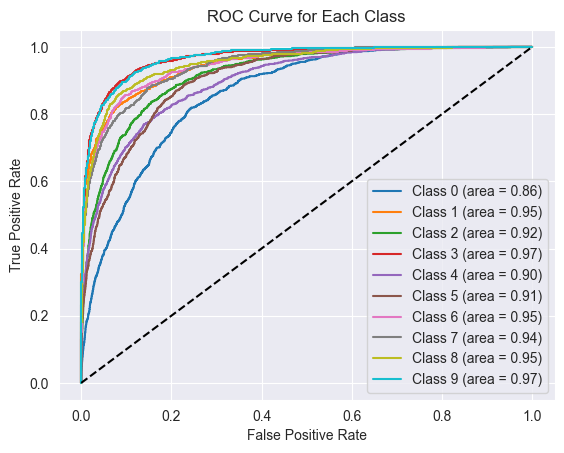

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve for each class
def plot_roc_curve(y_true, y_pred, n_classes=10):
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(loc='best')
    plt.show()

plot_roc_curve(y_val, y_val_pred)

### Predict test images and save the result in csv file

In [13]:
# Use the model we train to predict test images
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Create an ID column based on index of each prediction
ids = np.arange(len(y_test_pred_classes))

# Create a DateFrame with id and label
df_predictions = pd.DataFrame({
    'id': ids,
    'label': y_test_pred_classes
})

# Write the DataFrame to a CSV file
csv_file_path = './submission.csv'
df_predictions.to_csv(csv_file_path, index=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step


### Summary
During the training and evaluation of our CIFAR-10 models, we explored:

- **Key Findings:**
  - Our CNN model achieved a test accuracy of approximately 63%.
  - The model performs relatively well for classes 3, 7, 8, and 9 with F1-scores ranging from 0.64 to 0.75. This indicates it is better at identifying these classes.
  - Precision and recall are balanced for these classes, suggesting good performance.
  - The model struggles with classes 0, 1, and 5, as indicated by lower precision, recall, and F1-scores. For instance, the model has a precision of 0.38 for class 0, meaning it often misclassified other classes as class 0.
  
- **Steps Taken:**
  - Load data from given input
  - Implemented a train-validation-test 80-20 split with a random state of 101.
  - Trained models using a basic CNN architecture
  - Test model with accuracy and loss
  - Evaluated model with metrics such as accuracy, precision, recall and F1-score.
  - Plot ROC curve to display performance
  - Classify test images, record the labels and write to csv file for final submitting.
  
- **Possible Improvements:**
  - Fine-tune hyperparameters such as learning rate, batch size, and number of epochs to enhance model performance.
  - Consider using more advanced architectures like ResNet or DenseNet for better performance.